<h1>Оглавление<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-задания." data-toc-modified-id="Описание-задания.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание задания.</a></span></li><li><span><a href="#Предобработка-данных." data-toc-modified-id="Предобработка-данных.-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных.</a></span><ul class="toc-item"><li><span><a href="#Результат-предобработки-данных." data-toc-modified-id="Результат-предобработки-данных.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Результат предобработки данных.</a></span></li></ul></li><li><span><a href="#Исследовательский-анализ-данных." data-toc-modified-id="Исследовательский-анализ-данных.-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных.</a></span></li><li><span><a href="#Общие-выводы-по-датасету." data-toc-modified-id="Общие-выводы-по-датасету.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Общие выводы по датасету.</a></span></li></ul></div>

## Описание задания.

Перед вами датасет. 

•	user_id идентификатор пользователя  
•	data_from дата начала действия подписки  
•	data_to дата конца действия подписки  
•	data_created дата создания  
•	revenue - доход  
•	currency- валюта  
•	commission- комиссия  

Необходимо провести анализ сета и вытянуть из данных максимальное кол-во информации:
1)	Посчитать средние показатели. (какие вы считаете значимыми)  
2)	Определить разные группы пользователей по доходу.  
3)	Определить тип подписки по продолжительности.  
4)	Сделать предположение почему есть нулевая стоимость.  
5)	Выявить сезонность данных.  
6)	Составить распределенную выручку по дням потребления с учетом курса валют.  

## Предобработка данных.

Импортируем основные библиотеки для начала работы.

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import dask.dataframe as dd

Запишем датасет в переменную data. Прочитаем csv файл, воспользуемся разделителем `sep`.

In [2]:
data = pd.read_csv('C:/Users/truel/datasets/test_base.csv', sep='|')

Отобразим основную информацию о датафрейме с помощью метода `info()`.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010487 entries, 0 to 1010486
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype  
---  ------        --------------    -----  
 0   user_id       1010487 non-null  int64  
 1   data_from     1010487 non-null  object 
 2   data_to       1010487 non-null  object 
 3   data_created  1010487 non-null  object 
 4   money         439795 non-null   float64
 5   currency      1010487 non-null  object 
 6   commission    304114 non-null   float64
dtypes: float64(2), int64(1), object(4)
memory usage: 54.0+ MB


Столбцы **data_from, data_to, data_created** содержат данные о дате создания профиля, начале и окончании действия подписки. Приведем данные столбцы в формат datetime.

In [4]:
data['data_from'] = pd.to_datetime(data['data_from'])
data['data_to'] = pd.to_datetime(data['data_to'])
data['data_created'] = pd.to_datetime(data['data_created'], format="%Y.%m.%d %H:%M:%S")

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010487 entries, 0 to 1010486
Data columns (total 7 columns):
 #   Column        Non-Null Count    Dtype         
---  ------        --------------    -----         
 0   user_id       1010487 non-null  int64         
 1   data_from     1010487 non-null  datetime64[ns]
 2   data_to       1010487 non-null  datetime64[ns]
 3   data_created  1010487 non-null  datetime64[ns]
 4   money         439795 non-null   float64       
 5   currency      1010487 non-null  object        
 6   commission    304114 non-null   float64       
dtypes: datetime64[ns](3), float64(2), int64(1), object(1)
memory usage: 54.0+ MB


Выведем первые пять строк датасета используя метод `head()`.

In [6]:
data.head()

,user_id,data_from,data_to,data_created,money,currency,commission
0,4512520820,2011-03-20,2011-03-20,2011-03-20 08:09:52.577,48.76641,$,NaN
1,45480,2011-03-20,2011-03-21,2011-03-20 08:18:50.563,14777.70000,$,NaN
2,454414960,2011-03-20,2011-03-21,2011-03-20 09:25:52.900,152.21031,$,NaN
3,4512192950,2011-03-20,2011-03-21,2011-03-20 09:45:27.467,152.21031,$,NaN
4,4512747120,2011-03-20,2011-03-21,2011-03-20 09:47:39.687,152.21031,$,NaN


С названиями столбцов все в порядке. Нижний и "python" регистры соблюдены.  
Отобразим количество пропущенных значений для каждого столбца. Воспользуемся методом `isna().sum()`

In [7]:
data.isna().sum()

user_id              0
data_from            0
data_to              0
data_created         0
money           570692
currency             0
commission      706373
dtype: int64

In [8]:
display(data['money'].isna().sum())
display(data['commission'].isna().sum())

570692

706373

В столбцах **money** и **commission** присутствует большое количество пропущенных значений. Заполнять пропуски медианным либо средним значениями в данном случае не стоит, так как это может привести к искажению результатов исследования.

Воспользуемся методом `duplicated().sum()` и проверим присутствуют ли в датасете строки дубликаты.

In [9]:
data.duplicated().sum()

174

В датасете присутствуют 174 дублированные строки. Воспользуемся методом `drop_duplicates()` и удалим их.

In [10]:
data = data.drop_duplicates()

### Результат предобработки данных.

В процессе предобработки датасета выявлены пропуски в столбцах **money** и **commission**. Принято решение не заполнять пропуски, чтобы не исказить результаты исследования.           
Столбцы **data_from, data_to, data_created** приведены к формату datetime.  
Обнаружены 174 строки дубликата. Данные строки были удалены.   

## Исследовательский анализ данных.

Отобразим первые пять строк датасета и посмотрим гистограммы для каждого столбца.

In [11]:
data.head()

,user_id,data_from,data_to,data_created,money,currency,commission
0,4512520820,2011-03-20,2011-03-20,2011-03-20 08:09:52.577,48.76641,$,NaN
1,45480,2011-03-20,2011-03-21,2011-03-20 08:18:50.563,14777.70000,$,NaN
2,454414960,2011-03-20,2011-03-21,2011-03-20 09:25:52.900,152.21031,$,NaN
3,4512192950,2011-03-20,2011-03-21,2011-03-20 09:45:27.467,152.21031,$,NaN
4,4512747120,2011-03-20,2011-03-21,2011-03-20 09:47:39.687,152.21031,$,NaN


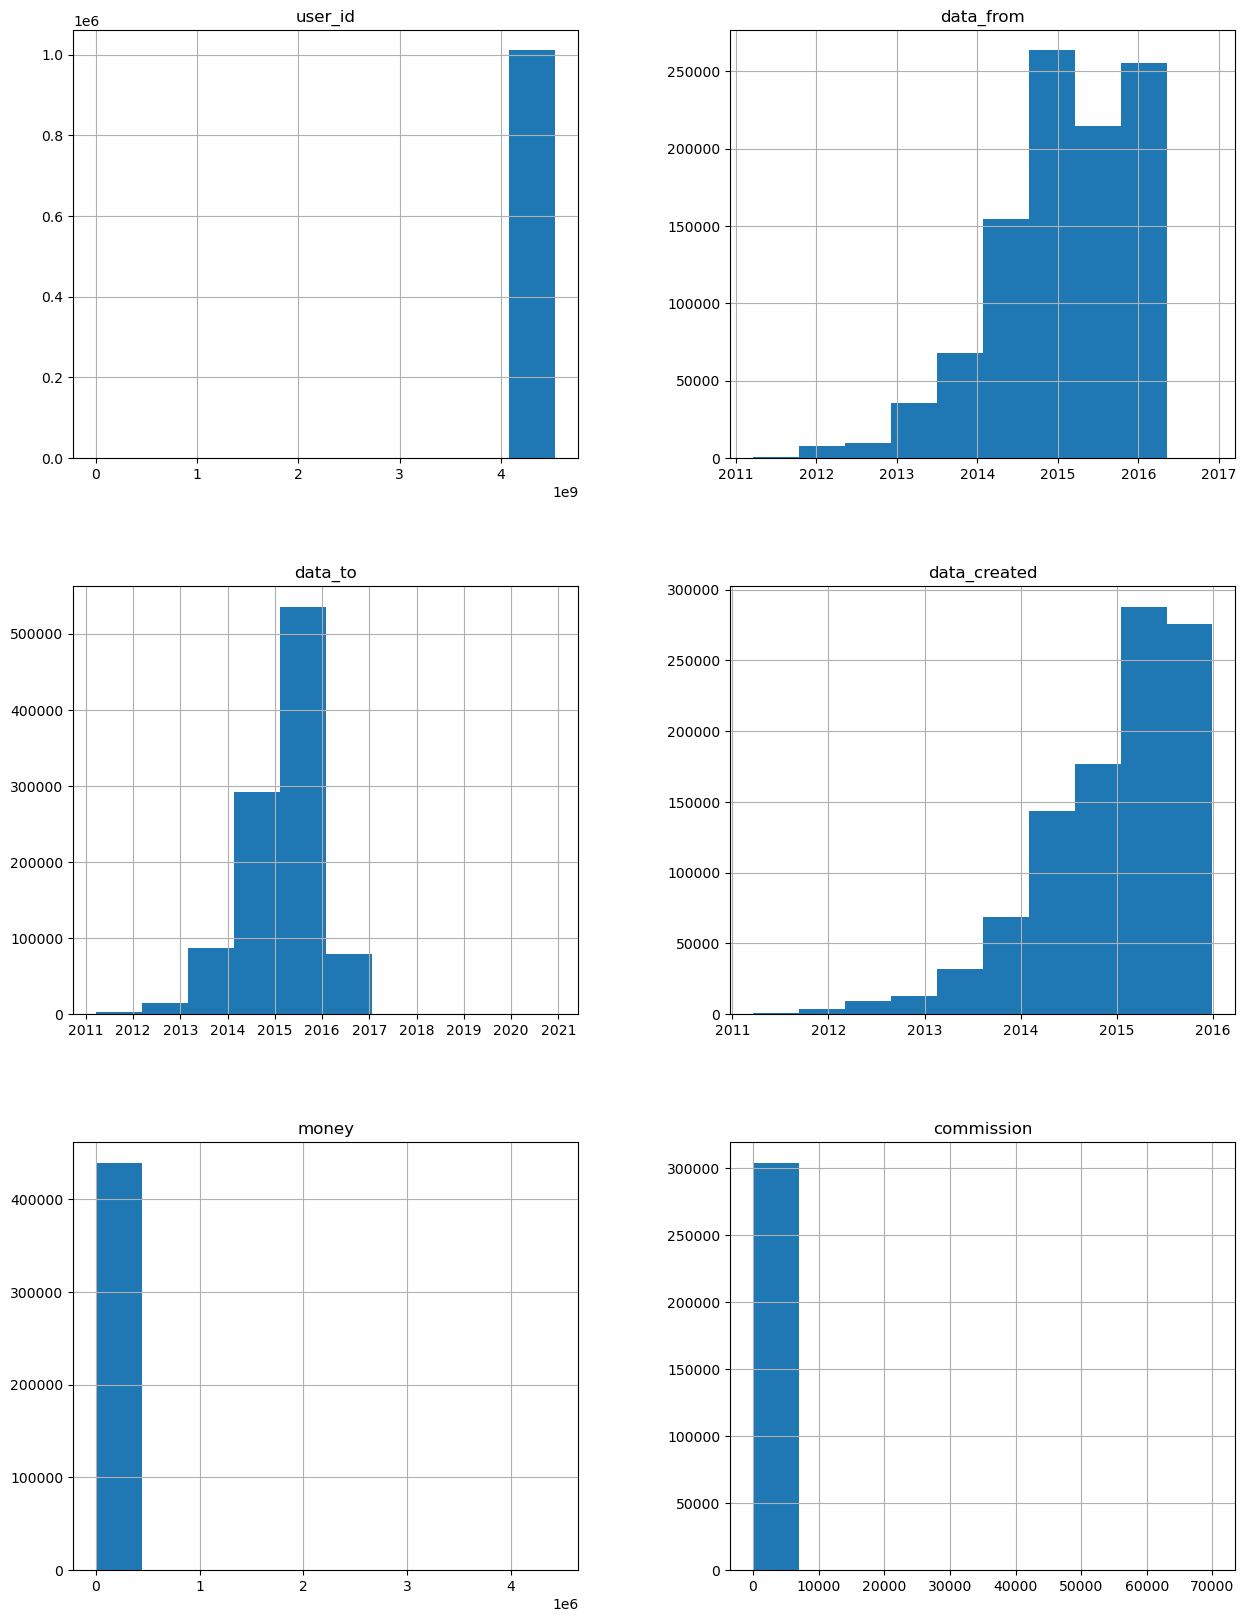

In [12]:
data.hist(figsize=(15, 20));

Используем метод `describe` для столбца **data_from** и изучим его особенности.

In [13]:
data[['data_from']].describe(datetime_is_numeric=True)

,data_from
count,1010313
mean,2015-01-09 18:03:48.867687936
min,2011-03-20 00:00:00
25%,2014-07-04 00:00:00
50%,2015-02-22 00:00:00
75%,2015-10-29 00:00:00
max,2016-12-02 00:00:00


Самая раняя дата активации подписки - 2011-03-20. Самая поздняя - 2016-12-02. Среднее значение - 2015-01-09. 

Визуализируем данные и построим гистограмму для столбца **data_from**.

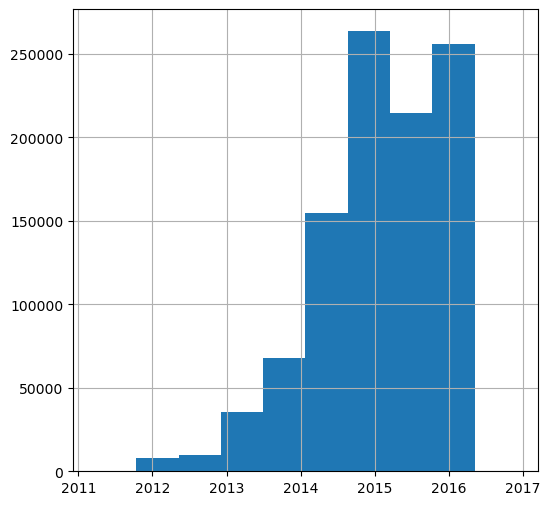

In [14]:
data['data_from'].hist(figsize=(6, 6));

На гистограмме наблюдаем следующие особенности: резкий рост покупки подписки начался с 2014 года. в 2015 году наблюдается снижение и далее к концу 2015 года рост возобновляется. Вероятно начиная с 2014 года проводились маркетинговые мероприятия направленные на стимуляцию пользователей к приобретению платной подписки. Также на данном графике наблюдаем тренд сезонности. Приток подписок и пользователей наблюдается во второй половине каждого года. 

Воспользуемся аналогичными инструментами для столбца **data_to**.

In [15]:
data[['data_to']].describe(datetime_is_numeric=True)

,data_to
count,1010313
mean,2015-03-24 01:57:52.428445184
min,2011-03-20 00:00:00
25%,2014-11-30 00:00:00
50%,2015-04-15 00:00:00
75%,2015-11-18 00:00:00
max,2020-12-10 00:00:00


В столбце **data_to** указана дата окончания подписки.  
2011-03-20 - самая раняя дата окончания подписки. 2020-12-10 - самая поздняя дата. 2015-03-24 - среднее значение. 

Далее построим гистограмму для столбца **data_to**.

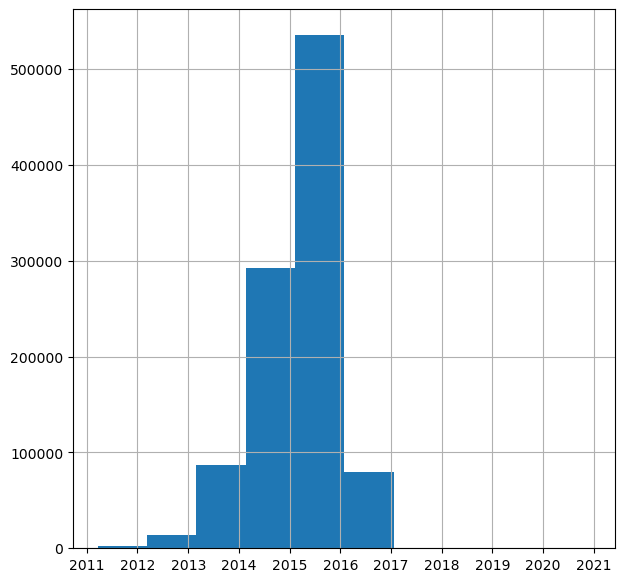

In [16]:
data['data_to'].hist(figsize=(7, 7));

На гистограмме видно, что у большинства пользователей подписка закончилась в период с 2015 по 2016 год. Что соответствует активному периоду покупок подписки (на основе предыдущей гистограммы).

Используем метод `describe` для столбца **data_created** и изучим его особенности.

In [17]:
data[['data_created']].describe(datetime_is_numeric=True)

,data_created
count,1010313
mean,2015-01-10 06:18:34.516452352
min,2011-03-20 08:09:52.577000
25%,2014-07-04 06:51:47.296999936
50%,2015-02-22 16:48:50.543000064
75%,2015-10-29 10:37:49.830000128
max,2015-12-31 23:01:51.280000


Самая раняя дата создания профиля - 2011-03-20. Самая поздняя - 2015-12-31. Среднее значение - 2015-01-10. В данном датасете представлены данные за практически полный 5 летний период с марта 2011 года по декабрь 2015. 

Визуализируем данные и построим гистограмму для столбца **data_created**.

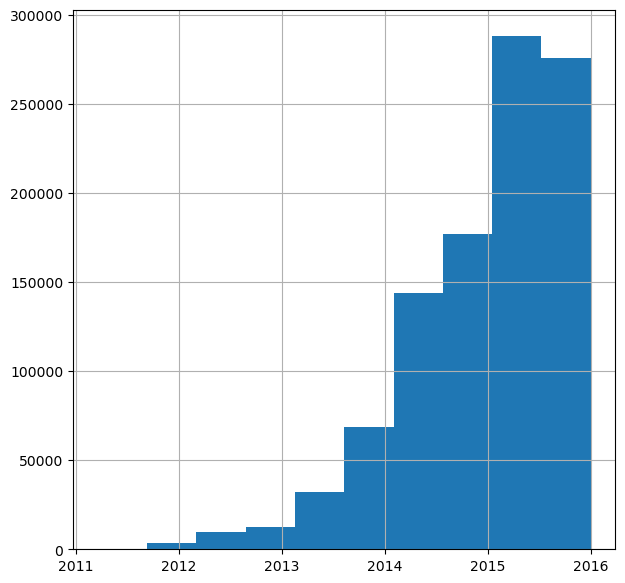

In [18]:
data['data_created'].hist(figsize=(7, 7));

На гистограмме видно, что резкий приток пользователей произошел в период с 2015 по 2016 год.   
Вероятно в данный временной интервал была проведена маркетинговая компания направленная на привлечение пользователей.

Создадим функцию categorize_earn, с помощью которой присвоим ранг каждому пользователю:  

Ранг Е - для пользователей с нулевой стоимостью  

Ранг D - для пользователей заплативших от 1 до 100$  

Ранг С - для пользователей заплативших от 101 до 1000$ 

Ранг B - для пользователей заплативших от 1001 до 10000$

Ранг А - для пользователей заплативших от 10001 $

In [19]:
def categorize_earn(money):
    try:
        
        if money == 0:
            return 'E'
        elif 1 <= money <= 100:
            return 'D'
        elif  101 <= money <= 1000:
            return 'C'
        elif 1001 <= money <= 10000:
            return 'B'
        elif money >= 10001:
            return 'A'
    except:
        pass

Добавим в датасет столбце total_income_category - результат работы написаной функции.

In [20]:
data['total_income_category'] = data['money'].apply(categorize_earn)

Посчитаем количество пользователей в зависимости от категории в которую они попали. 

In [21]:
data.groupby('total_income_category')['user_id'].count()

total_income_category
A    188197
B      6844
C        66
D        12
E    244559
Name: user_id, dtype: int64

Самая многочисленная категория Е - 244 559 пользователей. Вероятно это пользователи, которые не покупали подписку. 

Категория А - 188 197 пользователей. Потратили более 10001 $ на подписку. 

Категория B - 6844 пользователей. Потратили от 1001 до 10001 $.   

Категория С - 66 пользователей. Потратили от 101 до 1000 $.

Категория D - 12 пользователей. Потратили от 1 до 100 $. 

Визуалиризуем полученные данные с помощью столбчатой диаграммы.

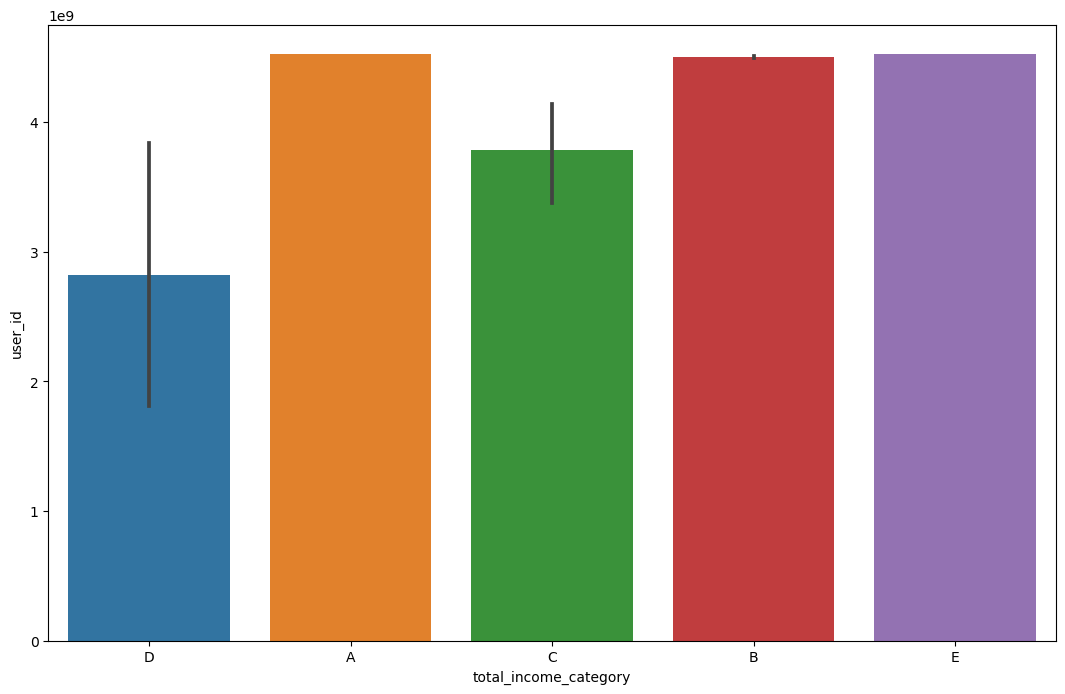

In [22]:
plt.figure(figsize = (13,8))
ax = sns.barplot(x=data['total_income_category'],y=data['user_id'])
ax.set_xticklabels(ax.get_xticklabels(),rotation = 0);

Далее необходимо определить сколько дней пользователь использовал подписку. Для этого создадим новый столбец **date_subscribe** результатом будет разность между столбцом **data_to** и **data_from**.

In [23]:
data['date_subscribe'] = data['data_to'] - data['data_from']

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1010313 entries, 0 to 1010486
Data columns (total 9 columns):
 #   Column                 Non-Null Count    Dtype          
---  ------                 --------------    -----          
 0   user_id                1010313 non-null  int64          
 1   data_from              1010313 non-null  datetime64[ns] 
 2   data_to                1010313 non-null  datetime64[ns] 
 3   data_created           1010313 non-null  datetime64[ns] 
 4   money                  439678 non-null   float64        
 5   currency               1010313 non-null  object         
 6   commission             303997 non-null   float64        
 7   total_income_category  439678 non-null   object         
 8   date_subscribe         1010313 non-null  timedelta64[ns]
dtypes: datetime64[ns](3), float64(2), int64(1), object(2), timedelta64[ns](1)
memory usage: 77.1+ MB


In [25]:
data.head()

,user_id,data_from,data_to,data_created,money,currency,commission,total_income_category,date_subscribe
0,4512520820,2011-03-20,2011-03-20,2011-03-20 08:09:52.577,48.76641,$,NaN,D,0 days
1,45480,2011-03-20,2011-03-21,2011-03-20 08:18:50.563,14777.70000,$,NaN,A,1 days
2,454414960,2011-03-20,2011-03-21,2011-03-20 09:25:52.900,152.21031,$,NaN,C,1 days
3,4512192950,2011-03-20,2011-03-21,2011-03-20 09:45:27.467,152.21031,$,NaN,C,1 days
4,4512747120,2011-03-20,2011-03-21,2011-03-20 09:47:39.687,152.21031,$,NaN,C,1 days


In [26]:
data['date_subscribe'].describe()

count                        1010313
mean      73 days 07:54:03.560757902
std      116 days 23:46:49.962618484
min               -48 days +00:00:00
25%                 22 days 00:00:00
50%                 30 days 00:00:00
75%                 32 days 00:00:00
max               2224 days 00:00:00
Name: date_subscribe, dtype: object

С помощью метода describe() наблюдаем аномалию минимальное значение дней подписки  -48. Воспользуемся функцией abs() для избавления от отрицательных значений. 

In [27]:
data['date_subscribe'] = data['date_subscribe'].abs()

In [28]:
data['date_subscribe'].describe()

count                        1010313
mean      73 days 07:54:12.454635345
std      116 days 23:46:44.387975362
min                  0 days 00:00:00
25%                 22 days 00:00:00
50%                 30 days 00:00:00
75%                 32 days 00:00:00
max               2224 days 00:00:00
Name: date_subscribe, dtype: object

Минимальное время подписки - 0 дней. Максимальное - 2224 дня. Среднее значение - 73 дня. 

Изучим столбец **commission**.

In [29]:
data['commission'].describe()

count    303997.000000
mean        282.974868
std         841.879580
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max       70000.000000
Name: commission, dtype: float64

Минимальное значение комиссии - 0. Максимальное - 70 000. Среднее значение составляет - 282,97. 

Рассчитаем среднее значение для столбца **money**. Опредилим сколько в среднем приносит пользователь с оплаты подписки.

In [30]:
data['money'].mean()

22213.473686144072

Среднее значение составляет - 22 198,21. 

Извлечем данные о днях недели, месяцах и годах из столбца **data_created** для определения тренда регистрации пользователей.

In [34]:
data['weekday'] = data['data_created'].dt.weekday
data['month'] = data['data_created'].dt.month
data['year'] = data['data_created'].dt.year

Построим гистограмму для нового столбца **weekday**. 

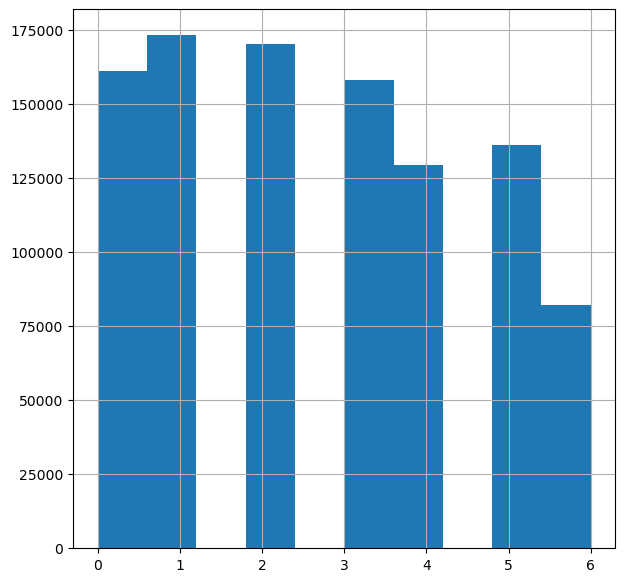

In [37]:
data['weekday'].hist(figsize=(7, 7));

Большинство регистраций приходится на вторник, среду, понедельник и четверг. Меньше всего регистраций в пятницу и воскресенье. 

Построим аналогичную гистограмму для столбца **month**.

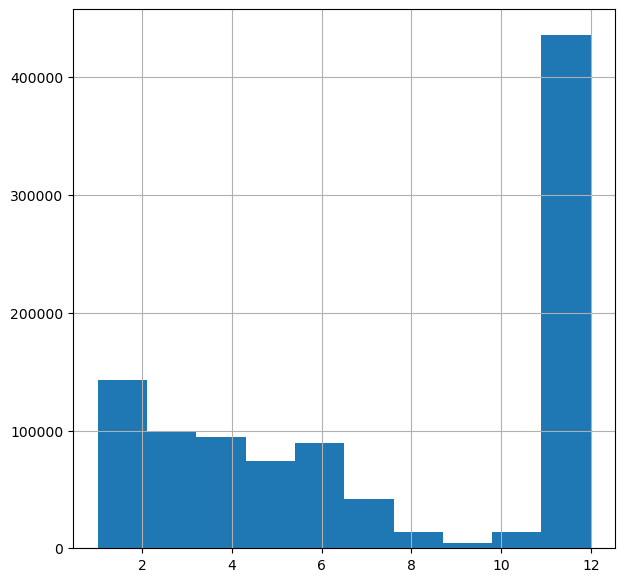

In [44]:
data['month'].hist(figsize=(7, 7));

Большинство регистраций зафиксировано в ноябре, а наименьшее в сентябре. 

Отобразим гистограмму для столбца **year**.

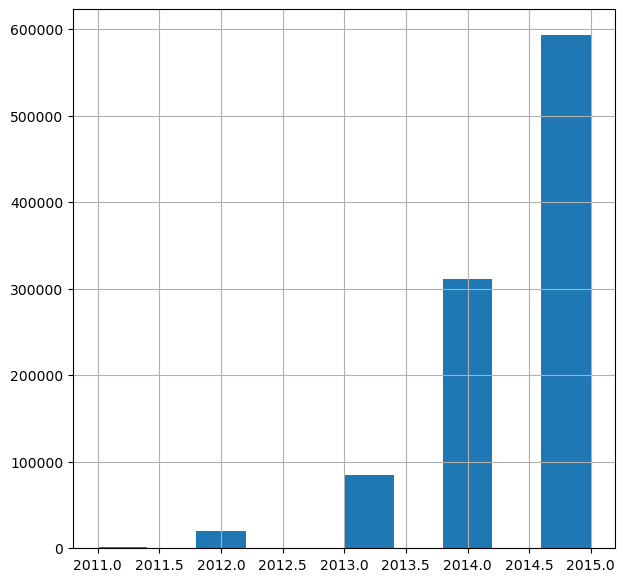

In [45]:
data['year'].hist(figsize=(7, 7));

Основное количество регистраций произошло в период с 2014 по 2015 год. 

## Общие выводы по датасету.

В результате исследования датасета были выявлены следующие особенности данных:

1) В датасете представлены профили пользователей созданные в период с марта 2011 года по декабрь 2015.

2) Средний доход от подписки составляет 22 198,21.

3) Среднее значение комиссии составляет 282,97.

4) Резкий приток пользователей произошел в период с 2015 по 2016 год. Вероятно в данный временной интервал была проведена маркетинговая компания направленная на привлечение пользователей. Чаще всего пользователи регистрировались в ноябре, с понедельника по четверг, а меньше всего в пятницу и воскресенье. 

5) Были выделены различные категории пользователей в зависимости от потраченных денег на оплату подписки.    
Самая многочисленная категория - Е (244 559 пользователей) люди, которые не покупали подписку.   
На втором месте категория А (188 197 пользователей) Потратили более 10001 на оплату подписки.

6) Среднее время на которое пользователи оформляют подписку составляет - 73 дня. 